In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit2/corporateCreditRatingWithFinancialRatios.csv
/kaggle/input/credit/corporate_rating.csv


In [9]:
!pip install scikit-learn==1.5.2 numpy==1.26.4 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 40.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb

In [2]:
df = pd.read_csv('/kaggle/input/credit/corporate_rating.csv')
target_col = "Rating"   # tên cột nhãn

# EDA

In [4]:
print(df.head())

  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0               44.203245  ...          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

None

count         mean            std  \
currentRatio                        2029.0     3.529607      44.052361   
quickRatio                          2029.0     2.653986      32.944817   
cashRatio                           2029.0     0.667364       3.583943   
daysOfSalesOutstanding              2029.0   333.795606    4447.839583   
netProfitMargin                     2029.0     0.278447       6.064134   
pretaxProfitMargin                  2029.0     0.431483       8.984982   
grossProfitMargin                   2029.0     0.497968       0.525307   
operatingProfitMargin               2029.0     0.587322      11.224622   
returnOnAssets                      2029.0   -37.517928    1166.172220   
returnOnCapitalEmployed             2029.0   -73.974193    2350.275719   
returnOnEquity                      2029.0   143.494296    4406.515045   
assetTurnover                       2029.0  3678.339699   95654.101378   
fixedAssetTurnover                  2029.0  7269.487436  188996.680293   
debtEquityRatio                     2029.0     2.328306      87.528880   
debtRatio                           2029.0     0.661495       0.208921   
effectiveTaxRate                    2029.0     0.397572      10.595075   
freeCashFlowOperatingCashFlowRatio  2029.0     0.409550       3.796488   
freeCashFlowPerShare                2029.0  5094.718642  146915.616728   
cashPerShare                        2029.0  4227.548561  122399.951921   
companyEquityMultiplier             2029.0     3.323579      87.529866   
ebitPerRevenue                      2029.0     0.437454       8.984299   
enterpriseValueMultiple             2029.0    48.287985     529.118961   
operatingCashFlowPerShare           2029.0  6515.122730  177529.014598   
operatingCashFlowSalesRatio         2029.0     1.447653      19.483294   
payablesTurnover                    2029.0    38.002718     758.923588   

                                             min        25%        50%  \
currentRatio                           -0.932005   1.071930   1.493338   
quickRatio                             -1.893266   0.602825   0.985679   
cashRatio                              -0.192736   0.130630   0.297493   
daysOfSalesOutstanding               -811.845623  22.905093  42.374120   
netProfitMargin                      -101.845815   0.021006   0.064753   
pretaxProfitMargin                   -124.343612   0.025649   0.084965   
grossProfitMargin                     -14.800817   0.233127   0.414774   
operatingProfitMargin                -124.343612   0.044610   0.107895   
returnOnAssets                     -40213.178290   0.019176   0.045608   
returnOnCapitalEmployed            -87162.162160   0.028112   0.074421   
returnOnEquity                        -63.814815   0.050254   0.122383   
assetTurnover                          -9.157477   0.387236   0.698345   
fixedAssetTurnover                    -26.797773   1.019889   3.811684   
debtEquityRatio                     -2556.419643   1.044617   1.652456   
debtRatio                               0.000000   0.535562   0.640915   
effectiveTaxRate                     -100.611015   0.146854   0.300539   
freeCashFlowOperatingCashFlowRatio   -120.916010   0.271478   0.644529   
freeCashFlowPerShare                -4912.742330   0.411992   2.131742   
cashPerShare                          -19.150347   1.566038   3.686513   
companyEquityMultiplier             -2555.419643   2.046822   2.652456   
ebitPerRevenue                       -124.343612   0.028057   0.087322   
enterpriseValueMultiple             -3749.921337   6.238066   9.274398   
operatingCashFlowPerShare          -11950.490820   2.356735   4.352584   
operatingCashFlowSalesRatio            -4.461837   0.073886   0.133050   
payablesTurnover                      -76.662850   2.205912   5.759722   

                                          75%           max  
currentRatio                         2.166891  1.725505e+03  
quickRatio                           1.453820  1.139542e+03  
c

Rating
BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: count, dtype: int64

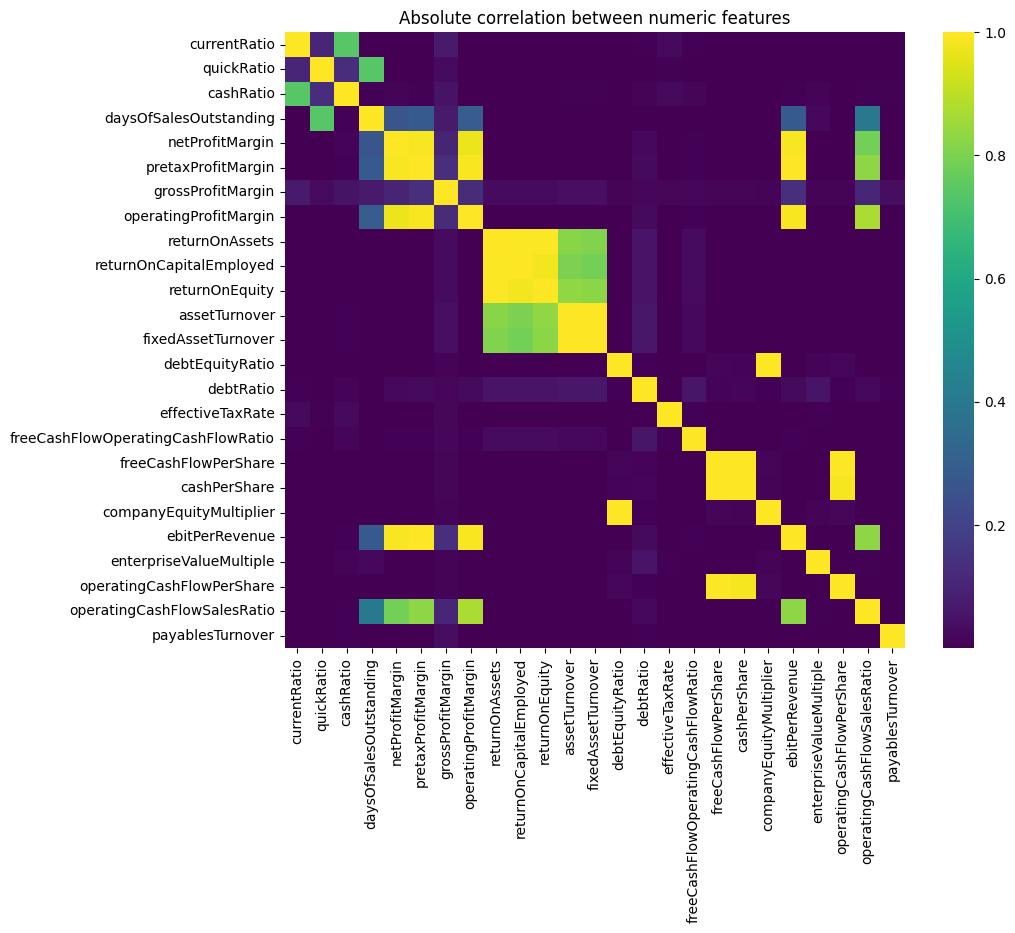

In [9]:
# Quick EDA
display(df.info())
display(df.describe().T)
# Rating distribution
if "Rating" in df.columns:
    display(df["Rating"].value_counts())
else:
    for c in df.columns:
        if "rating" in c.lower():
            display(df[c].value_counts())

# Correlation heatmap for numeric features (subset to avoid huge plot)
num = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[num].corr().abs(), cmap="viridis")
plt.title("Absolute correlation between numeric features")
plt.show()

# TRAIN 1

In [5]:
!pip install scikit-learn==1.5.1 imbalanced-learn==0.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install scikit-learn==1.4.2 imbalanced-learn==0.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 93.0 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb
import joblib  # Để save model

In [3]:
try:
    df = pd.read_csv("/kaggle/input/credit/corporate_rating.csv")
except FileNotFoundError:
    print("Error: CSV file not found. Please check the path.")
    exit()

print("📌 Data shape:", df.shape)
print(df.head())
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Rating Distribution ---")
print(df["Rating"].value_counts())

📌 Data shape: (2029, 31)
  Rating                   Name Symbol                  Rating Agency Name  \
0      A  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
1    BBB  Whirlpool Corporation    WHR          Egan-Jones Ratings Company   
2    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
3    BBB  Whirlpool Corporation    WHR                       Fitch Ratings   
4    BBB  Whirlpool Corporation    WHR  Standard & Poor's Ratings Services   

         Date             Sector  currentRatio  quickRatio  cashRatio  \
0  11/27/2015  Consumer Durables      0.945894    0.426395   0.099690   
1   2/13/2014  Consumer Durables      1.033559    0.498234   0.203120   
2    3/6/2015  Consumer Durables      0.963703    0.451505   0.122099   
3   6/15/2012  Consumer Durables      1.019851    0.510402   0.176116   
4  10/24/2016  Consumer Durables      0.957844    0.495432   0.141608   

   daysOfSalesOutstanding  ...  effectiveTaxRate  \
0              

In [7]:
# Define cat_cols and num_cols
cat_cols = ['Sector'] if 'Sector' in df.columns else []
num_cols = [col for col in df.columns if col not in ['Rating'] + cat_cols]

# Rule-based scoring functions
def score_liquidity(row):
    score = 0
    if row['currentRatio'] > 1.5: score += 1
    elif row['currentRatio'] < 1.0: score -= 1
    if row['quickRatio'] > 1.0: score += 1
    elif row['quickRatio'] < 0.5: score -= 1
    if row['cashRatio'] > 0.5: score += 1
    elif row['cashRatio'] < 0.2: score -= 1
    return score

def score_efficiency(row):
    score = 0
    if row['daysOfSalesOutstanding'] < 30: score += 1
    elif row['daysOfSalesOutstanding'] > 90: score -= 1
    if row['assetTurnover'] > 1: score += 1
    elif row['assetTurnover'] < 0.5: score -= 1
    if row['fixedAssetTurnover'] > 2: score += 1
    elif row['fixedAssetTurnover'] < 0.5: score -= 1
    if row['payablesTurnover'] < 5: score += 1
    elif row['payablesTurnover'] > 15: score -= 1
    return score

def score_profitability(row):
    score = 0
    if row['netProfitMargin'] > 0.1: score += 1
    elif row['netProfitMargin'] < 0.02: score -= 1
    if row['returnOnAssets'] > 0.05: score += 1
    elif row['returnOnAssets'] < 0.01: score -= 1
    if row['returnOnEquity'] > 0.1: score += 1
    elif row['returnOnEquity'] < 0.02: score -= 1
    return score

def score_leverage(row):
    score = 0
    if row['debtEquityRatio'] < 1: score += 1
    elif row['debtEquityRatio'] > 2: score -= 1
    if row['debtRatio'] < 0.5: score += 1
    elif row['debtRatio'] > 0.8: score -= 1
    return score

def score_cashflow(row):
    score = 0
    if row['freeCashFlowPerShare'] > 0: score += 1
    elif row['freeCashFlowPerShare'] < 0: score -= 1
    if row['operatingCashFlowPerShare'] > 0: score += 1
    elif row['operatingCashFlowPerShare'] < 0: score -= 1
    return score

def total_score(row):
    return (
        score_liquidity(row) +
        score_efficiency(row) +
        score_profitability(row) +
        score_leverage(row) +
        score_cashflow(row)
    )

# Updated to handle 10 classes
def map_score_to_rating(score):
    if score >= 9: return 'AAA'
    elif score >= 7: return 'AA'
    elif score >= 5: return 'A'
    elif score >= 3: return 'BBB'
    elif score >= 1: return 'BB'
    elif score >= -1: return 'B'
    elif score >= -3: return 'CCC'
    elif score >= -5: return 'CC'
    elif score >= -7: return 'C'
    else: return 'D'

# Ranges for synthetic data
ranges = {
    'currentRatio': (0.5, 3), 'quickRatio': (0.2, 2), 'cashRatio': (0.05, 1.5),
    'daysOfSalesOutstanding': (10, 120), 'netProfitMargin': (0, 0.3), 'pretaxProfitMargin': (0, 0.4),
    'grossProfitMargin': (0, 0.6), 'operatingProfitMargin': (0, 0.3), 'returnOnAssets': (0, 0.2),
    'returnOnCapitalEmployed': (0, 0.3), 'returnOnEquity': (0, 0.3), 'assetTurnover': (0.2, 2),
    'fixedAssetTurnover': (0.1, 4), 'debtEquityRatio': (0, 3), 'debtRatio': (0, 1),
    'effectiveTaxRate': (0, 0.5), 'freeCashFlowOperatingCashFlowRatio': (0, 1.5),
    'freeCashFlowPerShare': (-2, 5), 'cashPerShare': (0, 10), 'companyEquityMultiplier': (1, 5),
    'ebitPerRevenue': (0, 0.3), 'enterpriseValueMultiple': (1, 30),
    'operatingCashFlowPerShare': (-2, 5), 'operatingCashFlowSalesRatio': (0, 1.5),
    'payablesTurnover': (1, 20)
}

# Augment 
MIN_SAMPLES = 400
df_balanced = []

for label, group in df.groupby("Rating"):
    if len(group) < MIN_SAMPLES:
        n_to_add = MIN_SAMPLES - len(group)
        synthetic_rows = []
        attempts = 0
        max_attempts = n_to_add * 20  # Giới hạn số lần thử
        while len(synthetic_rows) < n_to_add and attempts < max_attempts:
            row = {col: np.random.uniform(*ranges.get(col, (0,1))) for col in num_cols}
            for cat_col in cat_cols:
                row[cat_col] = np.random.choice(group[cat_col].dropna().unique()) if not group[cat_col].dropna().empty else np.nan
            score = total_score(row)
            rating = map_score_to_rating(score)
            if rating == label:
                row['Rating'] = label
                synthetic_rows.append(row)
            attempts += 1
        # Nếu vẫn chưa đủ, bổ sung bằng sample từ group gốc
        if len(synthetic_rows) < n_to_add:
            n_missing = n_to_add - len(synthetic_rows)
            synthetic_df = pd.DataFrame(synthetic_rows)
            group_balanced = pd.concat([group, synthetic_df], ignore_index=True)
            group_balanced = pd.concat([group_balanced, group.sample(n=n_missing, replace=True, random_state=42)], ignore_index=True)
        else:
            synthetic_df = pd.DataFrame(synthetic_rows)
            group_balanced = pd.concat([group, synthetic_df], ignore_index=True)
        group_balanced = group_balanced.sample(n=MIN_SAMPLES, random_state=42).reset_index(drop=True)
        df_balanced.append(group_balanced)
    else:
        df_balanced.append(group)

df_balanced = pd.concat(df_balanced).reset_index(drop=True)
print("\n--- Rating Distribution After Augment ---")
print(df_balanced['Rating'].value_counts())


--- Rating Distribution After Augment ---
Rating
BBB    671
BB     490
AA     400
A      400
B      400
AAA    400
C      400
CC     400
CCC    400
D      400
Name: count, dtype: int64


In [33]:
# Chỉ dùng các cột số cho SMOTE
X_num = df_balanced[num_cols]
y = df_balanced['Rating']

le = LabelEncoder()
y_enc = le.fit_transform(y)

# Xác định các class nhỏ hơn MIN_SAMPLES (nếu còn)
class_counts = y.value_counts()
minority_classes = class_counts[class_counts < MIN_SAMPLES].index.tolist()
sampling_strategy = {le.transform([cls])[0]: MIN_SAMPLES for cls in minority_classes}

if sampling_strategy:
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
    X_res, y_res = smote.fit_resample(X_num, y_enc)
    df_balanced = pd.DataFrame(X_res, columns=num_cols)
    df_balanced['Rating'] = le.inverse_transform(y_res)
    print("\n--- Rating Distribution After SMOTE ---")
    print(df_balanced['Rating'].value_counts())
else:
    print("\n--- All classes already >= MIN_SAMPLES, no SMOTE needed ---")


--- All classes already >= MIN_SAMPLES, no SMOTE needed ---


In [8]:
# Chọn các cột cần hiển thị
cols = [
    'Rating', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding',
    'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin',
    'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover',
    'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate',
    'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare',
    'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple',
    'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover'
]

# In ra 5 mẫu đầu tiên của class AAA
print(df_balanced[df_balanced['Rating'] == 'AA'][cols].head(5).to_csv(index=False))

Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,assetTurnover,fixedAssetTurnover,debtEquityRatio,debtRatio,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
AA,0.9296452488769525,1.9510509957792646,1.0428359881193348,59.23646565995267,0.18416321320166565,0.33036399646421283,0.2340981981705922,0.07002425017073094,0.004459646829443708,0.0013175815001123302,0.22766249421812002,1.2142352441975939,2.065142946733812,0.7817232917239364,0.17557225218956418,0.221626067175961,0.15792960391036137,4.2873091670184245,3.6824386390081254,2.9976117108250353,0.18784681784725485,1.1077379029746726,3.8266676824669466,0.6411605853155513,17.567043016576775
AA,2.2760553568524466,0.9676159162242868,

In [11]:
X = df_balanced.drop(columns=["Rating"])
y = df_balanced["Rating"]

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Impute + Scale
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
X_num = X.select_dtypes(include=["int64", "float64"])
X_imp = imputer.fit_transform(X_num)
X_scaled = scaler.fit_transform(X_imp)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ------------------------------
# 2. Class Weights
# ------------------------------
classes = np.unique(y_enc)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_enc)
class_weights = dict(zip(classes, weights))
print("\nClass Weights:", class_weights)

# ------------------------------
# 3. Models
# ------------------------------
# LightGBM
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(le.classes_),
    class_weight=class_weights,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

# XGBoost (softprob để Voting soft hoạt động)
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    eval_metric="mlogloss"
)

# RF
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

# ------------------------------
# 4. Ensemble
# ------------------------------
ensemble = VotingClassifier(
    estimators=[("lgb", lgb_model), ("xgb", xgb_model), ("rf", rf_model)],
    voting="soft"
)

# ------------------------------
# 5. Train
# ------------------------------
ensemble.fit(X_train, y_train)


Class Weights: {0: 1.09025, 1: 1.09025, 2: 1.09025, 3: 1.09025, 4: 0.89, 5: 0.6499254843517138, 6: 1.09025, 7: 1.09025, 8: 1.09025, 9: 1.09025}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6364
[LightGBM] [Info] Number of data points in the train set: 3488, number of used features: 25
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.303928
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Warning] No fur

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(class_weight={0: 1.09025,
                                                           1: 1.09025,
                                                           2: 1.09025,
                                                           3: 1.09025, 4: 0.89,
                                                           5: 0.6499254843517138,
                                                           6: 1.09025,
                                                           7: 1.09025,
                                                           8: 1.09025,
                                                           9: 1.09025},
                                             learning_rate=0.05,
                                             n_estimators=500, num_class=10,
                                             objective='multiclass',
                                             random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=Non...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_class=10,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42))],
                 voting='soft')

In [13]:
# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = ensemble.predict(X_test)
print("\nClassification Report (Macro F1):")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Classification Report (Macro F1):
              precision    recall  f1-score   support

           A       0.55      0.59      0.57        80
          AA       0.64      0.54      0.59        80
         AAA       0.70      0.79      0.74        80
           B       0.66      0.47      0.55        80
          BB       0.58      0.53      0.55        98
         BBB       0.56      0.67      0.61       135
           C       1.00      1.00      1.00        80
          CC       1.00      0.99      0.99        80
         CCC       0.89      0.90      0.89        80
           D       1.00      1.00      1.00        80

    accuracy                           0.74       873
   macro avg       0.76      0.75      0.75       873
weighted avg       0.74      0.74      0.74       873



In [19]:
def predict_rating(input_dict):
    # Chuyển input thành DataFrame
    input_df = pd.DataFrame([input_dict])
    # Tiền xử lý giống như pipeline train
    input_num = input_df.select_dtypes(include=["int64", "float64"])
    input_imp = imputer.transform(input_num)
    input_scaled = scaler.transform(input_imp)
    # Dự đoán
    pred_enc = ensemble.predict(input_scaled)[0]
    return le.inverse_transform([pred_enc])[0]

# Ví dụ bộ chỉ số ngẫu nhiên hợp lý
sample_input = {
    'currentRatio': 0.945893595,
    'quickRatio': 0.426394628,
    'cashRatio': 0.099690083,
    'daysOfSalesOutstanding': 44.20324542,
    'netProfitMargin': 0.037480255,
    'pretaxProfitMargin': 0.049351395,
    'grossProfitMargin': 0.176631085,
    'operatingProfitMargin': 0.061509741,
    'returnOnAssets': 0.041188848,
    'returnOnCapitalEmployed': 0.091514291,
    'returnOnEquity': 0.165085389,
    'assetTurnover': 1.098947922,
    'fixedAssetTurnover': 5.535506094,
    'debtEquityRatio': 3.008011807,
    'debtRatio': 0.750499737,
    'effectiveTaxRate': 0.20271581,
    'freeCashFlowOperatingCashFlowRatio': 0.43755102,
    'freeCashFlowPerShare': 6.810673443,
    'cashPerShare': 9.809402795,
    'companyEquityMultiplier': 4.008011807,
    'ebitPerRevenue': 0.049351395,
    'enterpriseValueMultiple': 7.05708807,
    'operatingCashFlowPerShare': 15.56543837,
    'operatingCashFlowSalesRatio': 0.058637691,
    'payablesTurnover': 3.906654554
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input))

Dự đoán rating cho bộ chỉ số mẫu: A


In [20]:
sample_input2 = {
    'currentRatio': 1.033559023,
    'quickRatio': 0.498233736,
    'cashRatio': 0.2031204,
    'daysOfSalesOutstanding': 38.99115563,
    'netProfitMargin': 0.044062017,
    'pretaxProfitMargin': 0.048857158,
    'grossProfitMargin': 0.175715275,
    'operatingProfitMargin': 0.0665459,
    'returnOnAssets': 0.053203809,
    'returnOnCapitalEmployed': 0.1048,
    'returnOnEquity': 0.167952884,
    'assetTurnover': 1.207475553,
    'fixedAssetTurnover': 6.1719829,
    'debtEquityRatio': 2.156783103,
    'debtRatio': 0.683221822,
    'effectiveTaxRate': 0.074154853,
    'freeCashFlowOperatingCashFlowRatio': 0.54199683,
    'freeCashFlowPerShare': 8.625472888,
    'cashPerShare': 17.40226986,
    'companyEquityMultiplier': 3.156783103,
    'ebitPerRevenue': 0.048857158,
    'enterpriseValueMultiple': 6.460618222,
    'operatingCashFlowPerShare': 15.91424968,
    'operatingCashFlowSalesRatio': 0.067238532,
    'payablesTurnover': 4.002846054
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input2))

Dự đoán rating cho bộ chỉ số mẫu: BBB


In [22]:
sample_input3 = {
    'currentRatio': 1.741958239,
    'quickRatio': 1.317155756,
    'cashRatio': 0.220795711,
    'daysOfSalesOutstanding': 83.93196789,
    'netProfitMargin': 0.11193907,
    'pretaxProfitMargin': 0.15724578,
    'grossProfitMargin': 0.230177028,
    'operatingProfitMargin': 0.15724578,
    'returnOnAssets': 0.081280641,
    'returnOnCapitalEmployed': 0.144875588,
    'returnOnEquity': 0.143672391,
    'assetTurnover': 0.72611503,
    'fixedAssetTurnover': 3.15536503,
    'debtEquityRatio': 0.767608983,
    'debtRatio': 0.43426402,
    'effectiveTaxRate': 0.252389056,
    'freeCashFlowOperatingCashFlowRatio': 0.644841447,
    'freeCashFlowPerShare': 5.574517375,
    'cashPerShare': 5.792277992,
    'companyEquityMultiplier': 1.767608983,
    'ebitPerRevenue': 0.15724578,
    'enterpriseValueMultiple': 9.83329498,
    'operatingCashFlowPerShare': 8.644787645,
    'operatingCashFlowSalesRatio': 0.230444627,
    'payablesTurnover': 4.044776119
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input3))

Dự đoán rating cho bộ chỉ số mẫu: AA


In [21]:
sample_input4 = {
    'currentRatio': 1.1,
    'quickRatio': 0.7,
    'cashRatio': 0.3,
    'daysOfSalesOutstanding': 75,
    'netProfitMargin': 0.05,
    'pretaxProfitMargin': 0.08,
    'grossProfitMargin': 0.18,
    'operatingProfitMargin': 0.09,
    'returnOnAssets': 0.03,
    'returnOnCapitalEmployed': 0.05,
    'returnOnEquity': 0.07,
    'assetTurnover': 0.6,
    'fixedAssetTurnover': 1.1,
    'debtEquityRatio': 1.5,
    'debtRatio': 0.65,
    'effectiveTaxRate': 0.28,
    'freeCashFlowOperatingCashFlowRatio': 0.4,
    'freeCashFlowPerShare': 0.2,
    'cashPerShare': 1.1,
    'companyEquityMultiplier': 2.8,
    'ebitPerRevenue': 0.06,
    'enterpriseValueMultiple': 15.0,
    'operatingCashFlowPerShare': 0.3,
    'operatingCashFlowSalesRatio': 0.4,
    'payablesTurnover': 10.2
}

print("Dự đoán rating cho bộ chỉ số khác:", predict_rating(sample_input4))

Dự đoán rating cho bộ chỉ số khác: B


In [23]:
new_input = {
    'currentRatio': 4.006149968,
    'quickRatio': 3.603384392,
    'cashRatio': 0.323885557,
    'daysOfSalesOutstanding': 26.09679644,
    'netProfitMargin': -2.116675494,
    'pretaxProfitMargin': -2.111674939,
    'grossProfitMargin': 0.625229397,
    'operatingProfitMargin': -1.739121331,
    'returnOnAssets': -0.345235943,
    'returnOnCapitalEmployed': -0.408939232,
    'returnOnEquity': -3.65508954,
    'assetTurnover': 0.163102915,
    'fixedAssetTurnover': 1.124295506,
    'debtEquityRatio': 9.587221915,
    'debtRatio': 0.905546516,
    'effectiveTaxRate': -0.002368051,
    'freeCashFlowOperatingCashFlowRatio': 1.081560776,
    'freeCashFlowPerShare': -1222.252221,
    'cashPerShare': 2414.161296,
    'companyEquityMultiplier': 10.58722192,
    'ebitPerRevenue': -2.111674939,
    'enterpriseValueMultiple': 0.003473199,
    'operatingCashFlowPerShare': -1130.081867,
    'operatingCashFlowSalesRatio': -1.598157431,
    'payablesTurnover': 10.62801257
}

print("Dự đoán rating :", predict_rating(new_input))

Dự đoán rating : CCC


# TRAIN 2

In [4]:
import pandas as pd
import numpy as np

# --- Load data ---
df = pd.read_csv("/kaggle/input/credit/corporate_rating.csv")

# Define categorical and numerical columns
cat_cols = ['Sector'] if 'Sector' in df.columns else []
num_cols = [col for col in df.columns if col not in ['Rating'] + cat_cols]

# --- Threshold dictionary for scoring ---
thresholds = {
    "currentRatio": {"high": 1.5, "low": -1.0},
    "quickRatio": {"high": 1.0, "low": 0.5},
    "cashRatio": {"high": 0.5, "low": 0.2},
    "daysOfSalesOutstanding": {"high": 90, "low": 30, "reverse": True},
    "assetTurnover": {"high": 1.0, "low": 0.5},
    "fixedAssetTurnover": {"high": 2.0, "low": 0.5},
    "payablesTurnover": {"high": 15, "low": 5, "reverse": True},
    "netProfitMargin": {"high": 0.1, "low": 0.02},
    "returnOnAssets": {"high": 0.05, "low": 0.01},
    "returnOnEquity": {"high": 0.1, "low": 0.02},
    "debtEquityRatio": {"high": 2.0, "low": 1.0, "reverse": True},
    "debtRatio": {"high": 0.8, "low": 0.5, "reverse": True},
    "freeCashFlowPerShare": {"high": 0, "low": 0},
    "operatingCashFlowPerShare": {"high": 0, "low": 0},
}

# --- Scoring functions ---
def score_feature(value, config):
    if pd.isna(value):
        return 0
    reverse = config.get("reverse", False)
    high, low = config["high"], config["low"]

    if not reverse:
        if value > high: return 1
        elif value < low: return -1
    else:  # lower is better
        if value < low: return 1
        elif value > high: return -1
    return 0

def total_score(row):
    score = 0
    for feature, config in thresholds.items():
        if feature in row:
            score += score_feature(row[feature], config)
    return score

# --- Rating mapping table ---
rating_mapping = [
    (9, "AAA"),
    (7, "AA"),
    (5, "A"),
    (3, "BBB"),
    (1, "BB"),
    (-1, "B"),
    (-3, "CCC"),
    (-5, "CC"),
    (-7, "C"),
    (-999, "D"),
]

def map_score_to_rating(score):
    for threshold, rating in rating_mapping:
        if score >= threshold:
            return rating

# --- Synthetic data generator ---
def jitter_sample(series, size, noise=0.05):
    # Chỉ lấy giá trị numeric
    vals = pd.to_numeric(series, errors="coerce").dropna().values
    if len(vals) == 0:
        # fallback random nếu toàn NaN/chuỗi
        return np.random.uniform(low=0, high=1, size=size)
    idx = np.random.choice(len(vals), size=size, replace=True)
    sampled = vals[idx].astype(float)
    if sampled.max() > sampled.min():
        noise_scale = (sampled.max() - sampled.min()) * noise
    else:
        noise_scale = 0.01
    return sampled + np.random.normal(0, noise_scale, size=size)


# --- Data balancing ---
MIN_SAMPLES = 600
df_balanced = []

for label, group in df.groupby("Rating"):
    if len(group) < MIN_SAMPLES:
        n_to_add = MIN_SAMPLES - len(group)
        synthetic_rows = []
        for _ in range(n_to_add):
            row = {}
            for col in num_cols:
                if col in group.columns:
                    row[col] = jitter_sample(group[col], 1, noise=0.1)[0]
                else:
                    row[col] = np.nan
            for cat_col in cat_cols:
                if not group[cat_col].dropna().empty:
                    row[cat_col] = np.random.choice(group[cat_col].dropna().unique())
                else:
                    row[cat_col] = np.nan
            score = total_score(row)
            rating = map_score_to_rating(score)
            if rating == label:
                row["Rating"] = label
                synthetic_rows.append(row)

        synthetic_df = pd.DataFrame(synthetic_rows)
        group_balanced = pd.concat([group, synthetic_df], ignore_index=True)

        # Nếu chưa đủ, bổ sung bootstrap từ gốc
        if len(group_balanced) < MIN_SAMPLES:
            n_missing = MIN_SAMPLES - len(group_balanced)
            group_balanced = pd.concat([
                group_balanced,
                group.sample(n=n_missing, replace=True, random_state=42)
            ], ignore_index=True)

        df_balanced.append(group_balanced.sample(n=MIN_SAMPLES, random_state=42).reset_index(drop=True))
    else:
        df_balanced.append(group)

df_balanced = pd.concat(df_balanced).reset_index(drop=True)

print("\n--- Rating Distribution After Augment ---")
print(df_balanced['Rating'].value_counts())



--- Rating Distribution After Augment ---
Rating
BBB    671
A      600
AA     600
AAA    600
B      600
BB     600
C      600
CC     600
CCC    600
D      600
Name: count, dtype: int64


In [5]:
import pandas as pd

# Giả sử df đã load sẵn và có cột "Rating"
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Tính min / max theo từng Rating
min_vals = df.groupby("Rating")[num_cols].min()
max_vals = df.groupby("Rating")[num_cols].max()

print("Chỉ số nhỏ nhất theo Rating:")
print(min_vals)

print("\nChỉ số lớn nhất theo Rating:")
print(max_vals)


Chỉ số nhỏ nhất theo Rating:
        currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
Rating                                                                
A          -0.923732   -0.935131  -0.192736                0.000000   
AA          0.607189    0.201738   0.005885                0.000000   
AAA         1.052493    1.099182   0.101665               23.499067   
B           0.310328    0.001605   0.000060             -811.845623   
BB          0.073866    0.001893   0.000000                0.000000   
BBB        -0.932005   -1.893266  -0.183077                0.000000   
C           0.882851    0.569366   0.490287                0.000000   
CC          0.200930    0.158151   0.153501                0.000000   
CCC         0.110882    0.110882   0.000922                0.000000   
D           0.585399    0.389807   0.016529               54.738203   

        netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
Rating                                              

# điểm cải tiến
XGBoost: đổi sang multi:softprob để Voting soft hoạt động.

Class weights: truyền vào LGBM & RF, với XGB có thể cân nhắc truyền sample_weight khi .fit().

Evaluation: dùng classification_report + macro-F1 để kiểm tra cân bằng giữa các lớp.

Kết hợp augmentation: bạn vẫn giữ phần sinh dữ liệu từ rule-based (như đoạn code trước), sau đó train với pipeline nà

In [21]:
X = df_balanced.drop(columns=["Rating"])
y = df_balanced["Rating"]

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Impute + Scale
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
X_num = X.select_dtypes(include=["int64", "float64"])
X_imp = imputer.fit_transform(X_num)
X_scaled = scaler.fit_transform(X_imp)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ------------------------------
# 2. Class Weights
# ------------------------------
classes = np.unique(y_enc)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_enc)
class_weights = dict(zip(classes, weights))
print("\nClass Weights:", class_weights)

# ------------------------------
# 3. Models
# ------------------------------
# LightGBM
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(le.classes_),
    class_weight=class_weights,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

# XGBoost (softprob để Voting soft hoạt động)
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    eval_metric="mlogloss"
)

# RF
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

# ------------------------------
# 4. Ensemble
# ------------------------------
ensemble = VotingClassifier(
    estimators=[("lgb", lgb_model), ("xgb", xgb_model), ("rf", rf_model)],
    voting="soft"
)

# ------------------------------
# 5. Train
# ------------------------------
ensemble.fit(X_train, y_train)



Class Weights: {0: 1.0118333333333334, 1: 1.0118333333333334, 2: 1.0118333333333334, 3: 1.0118333333333334, 4: 1.0118333333333334, 5: 0.9047690014903129, 6: 1.0118333333333334, 7: 1.0118333333333334, 8: 1.0118333333333334, 9: 1.0118333333333334}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6367
[LightGBM] [Info] Number of data points in the train set: 4856, number of used features: 25
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.303927
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training 

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(class_weight={0: 1.0118333333333334,
                                                           1: 1.0118333333333334,
                                                           2: 1.0118333333333334,
                                                           3: 1.0118333333333334,
                                                           4: 1.0118333333333334,
                                                           5: 0.9047690014903129,
                                                           6: 1.0118333333333334,
                                                           7: 1.0118333333333334,
                                                           8: 1.0118333333333334,
                                                           9: 1.0118333333333334},
                                             learning_rate=0.05,
                                             n_estimators=500, num_class=10,
                                             objective='multiclass',
                                             ra...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_class=10,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42))],
                 voting='soft')

In [22]:
# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = ensemble.predict(X_test)
print("\nClassification Report (Macro F1):")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Macro-F1:", f1_score(y_test, y_pred, average="macro"))


Classification Report (Macro F1):
              precision    recall  f1-score   support

           A       0.70      0.73      0.72       120
          AA       0.91      0.95      0.93       120
         AAA       1.00      1.00      1.00       120
           B       0.82      0.78      0.80       120
          BB       0.70      0.59      0.64       120
         BBB       0.66      0.70      0.68       135
           C       1.00      1.00      1.00       120
          CC       1.00      1.00      1.00       120
         CCC       0.94      0.97      0.96       120
           D       1.00      1.00      1.00       120

    accuracy                           0.87      1215
   macro avg       0.87      0.87      0.87      1215
weighted avg       0.87      0.87      0.87      1215

Macro-F1: 0.8720974425257524


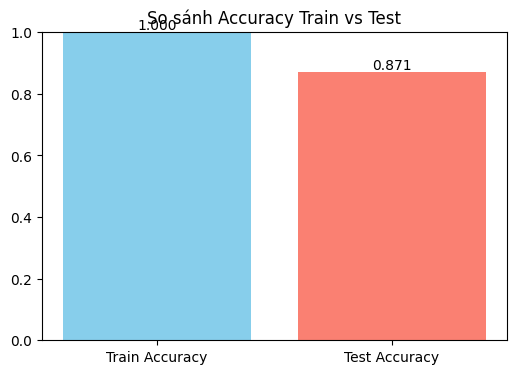

<Figure size 1000x600 with 0 Axes>

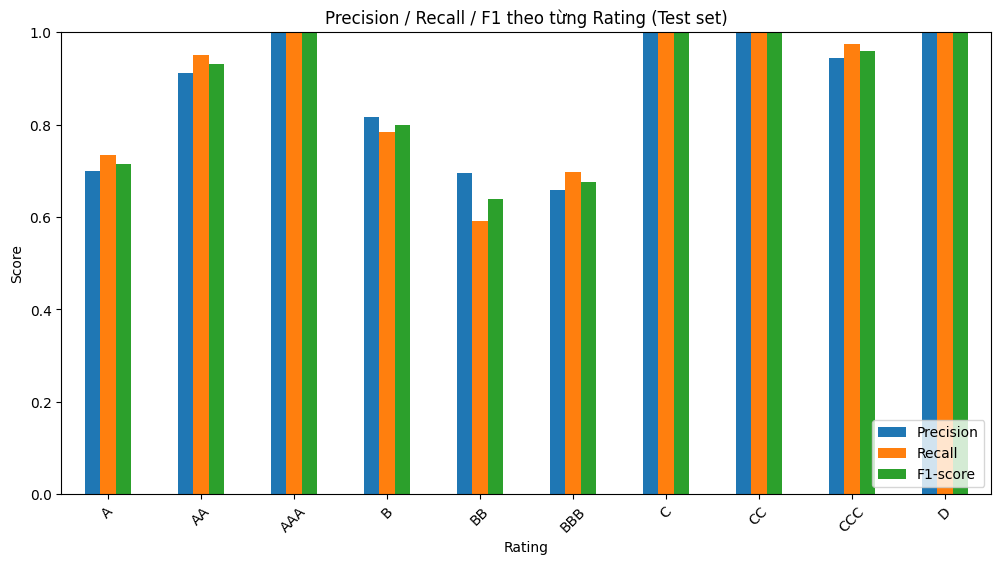

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ------------------------------
# 1. Đánh giá trên tập train/test
# ------------------------------
y_train_pred = ensemble.predict(X_train)
y_test_pred = ensemble.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

plt.figure(figsize=(6,4))
plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=["skyblue","salmon"])
plt.title("So sánh Accuracy Train vs Test")
plt.ylim(0,1)
for i,v in enumerate([train_acc, test_acc]):
    plt.text(i, v+0.01, f"{v:.3f}", ha="center", fontsize=10)
plt.show()

# ------------------------------
# 2. Precision / Recall / F1 theo từng Rating
# ------------------------------
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_test_pred, labels=np.arange(len(le.classes_)))

metrics_df = pd.DataFrame({
    "Rating": le.classes_,
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1
})

plt.figure(figsize=(10,6))
metrics_df.set_index("Rating").plot(kind="bar", figsize=(12,6))
plt.title("Precision / Recall / F1 theo từng Rating (Test set)")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [26]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [col for col in num_cols if col != "Rating"]

def predict_rating(input_dict):
    input_df = pd.DataFrame([input_dict])

    # Align with training numeric features
    input_num = input_df.reindex(columns=num_cols)

    # Impute + Scale
    input_imp = imputer.transform(input_num)
    input_scaled = scaler.transform(input_imp)

    # Predict
    pred_enc = ensemble.predict(input_scaled)[0]
    return le.inverse_transform([pred_enc])[0]


# Ví dụ bộ chỉ số ngẫu nhiên hợp lý
sample_input = {
    'currentRatio': 0.945893595,
    'quickRatio': 0.426394628,
    'cashRatio': 0.099690083,
    'daysOfSalesOutstanding': 44.20324542,
    'netProfitMargin': 0.037480255,
    'pretaxProfitMargin': 0.049351395,
    'grossProfitMargin': 0.176631085,
    'operatingProfitMargin': 0.061509741,
    'returnOnAssets': 0.041188848,
    'returnOnCapitalEmployed': 0.091514291,
    'returnOnEquity': 0.165085389,
    'assetTurnover': 1.098947922,
    'fixedAssetTurnover': 5.535506094,
    'debtEquityRatio': 3.008011807,
    'debtRatio': 0.750499737,
    'effectiveTaxRate': 0.20271581,
    'freeCashFlowOperatingCashFlowRatio': 0.43755102,
    'freeCashFlowPerShare': 6.810673443,
    'cashPerShare': 9.809402795,
    'companyEquityMultiplier': 4.008011807,
    'ebitPerRevenue': 0.049351395,
    'enterpriseValueMultiple': 7.05708807,
    'operatingCashFlowPerShare': 15.56543837,
    'operatingCashFlowSalesRatio': 0.058637691,
    'payablesTurnover': 3.906654554
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input))

Dự đoán rating cho bộ chỉ số mẫu: A


In [27]:
sample_input2 = {
    'currentRatio': 1.033559023,
    'quickRatio': 0.498233736,
    'cashRatio': 0.2031204,
    'daysOfSalesOutstanding': 38.99115563,
    'netProfitMargin': 0.044062017,
    'pretaxProfitMargin': 0.048857158,
    'grossProfitMargin': 0.175715275,
    'operatingProfitMargin': 0.0665459,
    'returnOnAssets': 0.053203809,
    'returnOnCapitalEmployed': 0.1048,
    'returnOnEquity': 0.167952884,
    'assetTurnover': 1.207475553,
    'fixedAssetTurnover': 6.1719829,
    'debtEquityRatio': 2.156783103,
    'debtRatio': 0.683221822,
    'effectiveTaxRate': 0.074154853,
    'freeCashFlowOperatingCashFlowRatio': 0.54199683,
    'freeCashFlowPerShare': 8.625472888,
    'cashPerShare': 17.40226986,
    'companyEquityMultiplier': 3.156783103,
    'ebitPerRevenue': 0.048857158,
    'enterpriseValueMultiple': 6.460618222,
    'operatingCashFlowPerShare': 15.91424968,
    'operatingCashFlowSalesRatio': 0.067238532,
    'payablesTurnover': 4.002846054
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input2))

Dự đoán rating cho bộ chỉ số mẫu: BBB


In [28]:
sample_input3 = {
    'currentRatio': 1.741958239,
    'quickRatio': 1.317155756,
    'cashRatio': 0.220795711,
    'daysOfSalesOutstanding': 83.93196789,
    'netProfitMargin': 0.11193907,
    'pretaxProfitMargin': 0.15724578,
    'grossProfitMargin': 0.230177028,
    'operatingProfitMargin': 0.15724578,
    'returnOnAssets': 0.081280641,
    'returnOnCapitalEmployed': 0.144875588,
    'returnOnEquity': 0.143672391,
    'assetTurnover': 0.72611503,
    'fixedAssetTurnover': 3.15536503,
    'debtEquityRatio': 0.767608983,
    'debtRatio': 0.43426402,
    'effectiveTaxRate': 0.252389056,
    'freeCashFlowOperatingCashFlowRatio': 0.644841447,
    'freeCashFlowPerShare': 5.574517375,
    'cashPerShare': 5.792277992,
    'companyEquityMultiplier': 1.767608983,
    'ebitPerRevenue': 0.15724578,
    'enterpriseValueMultiple': 9.83329498,
    'operatingCashFlowPerShare': 8.644787645,
    'operatingCashFlowSalesRatio': 0.230444627,
    'payablesTurnover': 4.044776119
}

print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input3))

Dự đoán rating cho bộ chỉ số mẫu: AA


In [29]:
sample_input4 = {
    'currentRatio': 2.711762033,
    'quickRatio': 2.525803779,
    'cashRatio': 0.101665019,
    'daysOfSalesOutstanding': 81.98422587,
    'netProfitMargin': 0.280838546,
    'pretaxProfitMargin': 0.085730067,
    'grossProfitMargin': 0.739893897,
    'operatingProfitMargin': 0.343793755,
    'returnOnAssets': 0.153498887,
    'returnOnCapitalEmployed': 0.063553431,
    'returnOnEquity': 0.27694315,
    'assetTurnover': 0.546573429,
    'fixedAssetTurnover': 7.791912721,
    'debtEquityRatio': 0.804202979,
    'debtRatio': 0.445738638,
    'effectiveTaxRate': 0.777494756,
    'freeCashFlowOperatingCashFlowRatio': 0.852356675,
    'freeCashFlowPerShare': 2.934447761,
    'cashPerShare': 9.196656716,
    'companyEquityMultiplier': 1.804202979,
    'ebitPerRevenue': 0.085730067,
    'enterpriseValueMultiple': 9.126765294,
    'operatingCashFlowPerShare': 3.442746269,
    'operatingCashFlowSalesRatio': 0.370370846,
    'payablesTurnover': 4.194076222
}
print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(sample_input4))

Dự đoán rating cho bộ chỉ số mẫu: AAA


In [31]:
new_input = {
    'currentRatio': 1.7747382,
    'quickRatio': 0.295287594,
    'cashRatio': 0.295287594,
    'daysOfSalesOutstanding': 0,
    'netProfitMargin': 0.046448375,
    'pretaxProfitMargin': 0.075088276,
    'grossProfitMargin': 0.14505422,
    'operatingProfitMargin': 0.079217918,
    'returnOnAssets': 0.075733181,
    'returnOnCapitalEmployed': 0.157013521,
    'returnOnEquity': 0.122382505,
    'assetTurnover': 1.630480751,
    'fixedAssetTurnover': 60.5034679,
    'debtEquityRatio': 0.615969418,
    'debtRatio': 0.381176408,
    'effectiveTaxRate': 0.381416414,
    'freeCashFlowOperatingCashFlowRatio': 0.753969867,
    'freeCashFlowPerShare': 12.61203053,
    'cashPerShare': 8.65132623,
    'companyEquityMultiplier': 1.615969418,
    'ebitPerRevenue': 0.075088276,
    'enterpriseValueMultiple': 1.933007471,
    'operatingCashFlowPerShare': 16.72749943,
    'operatingCashFlowSalesRatio': 0.077127661,
    'payablesTurnover': 8.754478605
}
print("Dự đoán rating cho bộ chỉ số mẫu:", predict_rating(new_input))

Dự đoán rating cho bộ chỉ số mẫu: BB


# TRAIN 3

In [3]:
import pandas as pd
import numpy as np

# --- Load data ---
df = pd.read_csv("/kaggle/input/credit/corporate_rating.csv")

# Define categorical and numerical columns
cat_cols = ['Sector'] if 'Sector' in df.columns else []
num_cols = [col for col in df.columns if col not in ['Rating'] + cat_cols]

# --- Threshold dictionary for scoring ---
thresholds = {
    "currentRatio": {"high": 1.5, "low": -0.932005},
    "quickRatio": {"high": 1.0, "low": -1.893266},
    "cashRatio": {"high": 0.5, "low": -0.192736},
    "daysOfSalesOutstanding": {"high": 90, "low": 0, "reverse": True},
    "assetTurnover": {"high": 1.0, "low": 0.5},
    "fixedAssetTurnover": {"high": 2.0, "low": 0.5},
    "payablesTurnover": {"high": 15, "low": -76.662850, "reverse": True},
    "netProfitMargin": {"high": 0.1, "low": -101.845815},
    "returnOnAssets": {"high": 0.05, "low": -33753.148610},
    "returnOnEquity": {"high": 0.1, "low": 0.02},
    "debtEquityRatio": {"high": 2.0, "low": 1.0, "reverse": True},
    "debtRatio": {"high": 0.8, "low": 0.5, "reverse": True},
    "freeCashFlowPerShare": {"high": 7181.092, "low": -4912.742},
    "operatingCashFlowPerShare": {"high": 6439270, "low": -11950},
}

# --- Scoring functions ---
def score_feature(value, config):
    if pd.isna(value):
        return 0
    reverse = config.get("reverse", False)
    high, low = config["high"], config["low"]

    if not reverse:
        if value > high: 
            return 1
        elif value < low: 
            return -1
    else:  # lower is better
        if value < low: 
            return 1
        elif value > high: 
            return -1
    return 0

def total_score(row):
    score = 0
    for feature, config in thresholds.items():
        if feature in row:
            score += score_feature(row[feature], config)
    return score

# --- Rating mapping table ---
rating_mapping = [
    (9, "AAA"),
    (7, "AA"),
    (5, "A"),
    (3, "BBB"),
    (1, "BB"),
    (-1, "B"),
    (-3, "CCC"),
    (-5, "CC"),
    (-7, "C"),
    (-999, "D"),
]

def map_score_to_rating(score):
    for threshold, rating in rating_mapping:
        if score >= threshold:
            return rating

# --- Synthetic data generator ---
def jitter_sample(series, size, noise=0.05):
    # Chỉ lấy giá trị numeric
    vals = pd.to_numeric(series, errors="coerce").dropna().values
    if len(vals) == 0:
        # fallback random nếu toàn NaN/chuỗi
        return np.random.uniform(low=0, high=1, size=size)
    idx = np.random.choice(len(vals), size=size, replace=True)
    sampled = vals[idx].astype(float)
    if sampled.max() > sampled.min():
        noise_scale = (sampled.max() - sampled.min()) * noise
    else:
        noise_scale = 0.01
    return sampled + np.random.normal(0, noise_scale, size=size)

# --- Data balancing ---
MIN_SAMPLES = 600
df_balanced = []

for label, group in df.groupby("Rating"):
    if len(group) < MIN_SAMPLES:
        n_to_add = MIN_SAMPLES - len(group)
        synthetic_rows = []
        for _ in range(n_to_add):
            row = {}
            for col in num_cols:
                if col in group.columns:
                    row[col] = jitter_sample(group[col], 1, noise=0.1)[0]
                else:
                    row[col] = np.nan
            for cat_col in cat_cols:
                if not group[cat_col].dropna().empty:
                    row[cat_col] = np.random.choice(group[cat_col].dropna().unique())
                else:
                    row[cat_col] = np.nan
            score = total_score(row)
            rating = map_score_to_rating(score)
            if rating == label:
                row["Rating"] = label
                synthetic_rows.append(row)

        synthetic_df = pd.DataFrame(synthetic_rows)
        group_balanced = pd.concat([group, synthetic_df], ignore_index=True)

        # Nếu chưa đủ, bổ sung bootstrap từ gốc
        if len(group_balanced) < MIN_SAMPLES:
            n_missing = MIN_SAMPLES - len(group_balanced)
            group_balanced = pd.concat([
                group_balanced,
                group.sample(n=n_missing, replace=True, random_state=42)
            ], ignore_index=True)

        df_balanced.append(group_balanced.sample(n=MIN_SAMPLES, random_state=42).reset_index(drop=True))
    else:
        df_balanced.append(group)

df_balanced = pd.concat(df_balanced).reset_index(drop=True)

print("\n--- Rating Distribution After Augment ---")
print(df_balanced['Rating'].value_counts())



--- Rating Distribution After Augment ---
Rating
BBB    671
A      600
AA     600
AAA    600
B      600
BB     600
C      600
CC     600
CCC    600
D      600
Name: count, dtype: int64


In [4]:
X = df_balanced.drop(columns=["Rating"])
y = df_balanced["Rating"]

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Impute + Scale
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
X_num = X.select_dtypes(include=["int64", "float64"])
X_imp = imputer.fit_transform(X_num)
X_scaled = scaler.fit_transform(X_imp)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ------------------------------
# 2. Class Weights
# ------------------------------
classes = np.unique(y_enc)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_enc)
class_weights = dict(zip(classes, weights))
print("\nClass Weights:", class_weights)

# ------------------------------
# 3. Models
# ------------------------------
# LightGBM
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(le.classes_),
    class_weight=class_weights,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

# XGBoost (softprob để Voting soft hoạt động)
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    eval_metric="mlogloss"
)

# RF
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

# ------------------------------
# 4. Ensemble
# ------------------------------
ensemble = VotingClassifier(
    estimators=[("lgb", lgb_model), ("xgb", xgb_model), ("rf", rf_model)],
    voting="soft"
)

# ------------------------------
# 5. Train
# ------------------------------
ensemble.fit(X_train, y_train)



Class Weights: {0: 1.0118333333333334, 1: 1.0118333333333334, 2: 1.0118333333333334, 3: 1.0118333333333334, 4: 1.0118333333333334, 5: 0.9047690014903129, 6: 1.0118333333333334, 7: 1.0118333333333334, 8: 1.0118333333333334, 9: 1.0118333333333334}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6346
[LightGBM] [Info] Number of data points in the train set: 4856, number of used features: 25
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.303927
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training from score -2.302436
[LightGBM] [Info] Start training 

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(class_weight={0: 1.0118333333333334,
                                                           1: 1.0118333333333334,
                                                           2: 1.0118333333333334,
                                                           3: 1.0118333333333334,
                                                           4: 1.0118333333333334,
                                                           5: 0.9047690014903129,
                                                           6: 1.0118333333333334,
                                                           7: 1.0118333333333334,
                                                           8: 1.0118333333333334,
                                                           9: 1.0118333333333334},
                                             learning_rate=0.05,
                                             n_estimators=500, num_class=10,
                                             objective='multiclass',
                                             ra...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_class=10,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42))],
                 voting='soft')

In [5]:
# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = ensemble.predict(X_test)
print("\nClassification Report (Macro F1):")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Macro-F1:", f1_score(y_test, y_pred, average="macro"))


Classification Report (Macro F1):
              precision    recall  f1-score   support

           A       0.71      0.68      0.70       120
          AA       0.95      0.97      0.96       120
         AAA       1.00      1.00      1.00       120
           B       0.82      0.76      0.79       120
          BB       0.61      0.62      0.61       120
         BBB       0.65      0.70      0.68       135
           C       1.00      1.00      1.00       120
          CC       0.99      1.00      1.00       120
         CCC       0.96      0.94      0.95       120
           D       1.00      1.00      1.00       120

    accuracy                           0.87      1215
   macro avg       0.87      0.87      0.87      1215
weighted avg       0.87      0.87      0.87      1215

Macro-F1: 0.8677586100157922


In [6]:
import joblib

# --- Save model ---
joblib.dump(ensemble, "train1.pkl")
print("✅ Model đã được lưu: ensemble_model.pkl")

# --- Save LabelEncoder để mapping ngược ---
joblib.dump(le, "label1.pkl")
print("✅ LabelEncoder đã được lưu: label_encoder.pkl")


✅ Model đã được lưu: ensemble_model.pkl
✅ LabelEncoder đã được lưu: label_encoder.pkl


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

train_sizes, train_scores, test_scores = learning_curve(
    ensemble, X_train, y_train, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Lấy trung bình và độ lệch chuẩn
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", label="Train Accuracy")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, "o-", label="Test Accuracy")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2)

plt.xlabel("Số mẫu train")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Ensemble (Voting Classifier)")
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2250
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 25
[LightGBM] [Info] Start training from score -2.367069
[LightGBM] [Info] Start training from score -2.367069
[LightGBM] [Info] Start training from score -2.484852
[LightGBM] [Info] Start training from score -2.058768
[LightGBM] [Info] Start training from score -2.395240
[LightGBM] [Info] Start training from score -2.424842
[LightGBM] [Info] Start training from score -2.287027
[LightGBM] [Info] Start training from score -2.100441
[LightGBM] [Info] Start training from score -2.058768
[LightGBM] [Info] Start training from score -2.654751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

# TRAIN 4 cho data2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import lightgbm as lgb
import xgboost as xgb

In [8]:
# --- Load data ---
df = pd.read_csv("/kaggle/input/credit2/corporateCreditRatingWithFinancialRatios.csv")

In [9]:
nan_counts = df.isna().sum()

print("--- Số lượng NaN theo cột ---")
print(nan_counts)

--- Số lượng NaN theo cột ---
Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64


In [10]:
rename_map = {
    "Current Ratio": "currentRatio",
    "Long-term Debt / Capital": "longTermDebtToCapital",
    "Debt/Equity Ratio": "debtEquityRatio",
    "Gross Margin": "grossMargin",
    "Operating Margin": "operatingMargin",
    "EBIT Margin": "ebitMargin",
    "EBITDA Margin": "ebitdaMargin",
    "Pre-Tax Profit Margin": "preTaxProfitMargin",
    "Net Profit Margin": "netProfitMargin",
    "Asset Turnover": "assetTurnover",
    "ROE - Return On Equity": "returnOnEquity",
    "Return On Tangible Equity": "returnOnTangibleEquity",
    "ROA - Return On Assets": "returnOnAssets",
    "ROI - Return On Investment": "returnOnInvestment",
    "Operating Cash Flow Per Share": "operatingCashFlowPerShare",
    "Free Cash Flow Per Share": "freeCashFlowPerShare",
}

df = df.rename(columns=rename_map)

In [11]:
df.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'currentRatio',
       'longTermDebtToCapital', 'debtEquityRatio', 'grossMargin',
       'operatingMargin', 'ebitMargin', 'ebitdaMargin', 'preTaxProfitMargin',
       'netProfitMargin', 'assetTurnover', 'returnOnEquity',
       'returnOnTangibleEquity', 'returnOnAssets', 'returnOnInvestment',
       'operatingCashFlowPerShare', 'freeCashFlowPerShare'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rating Agency              7805 non-null   object 
 1   Corporation                7805 non-null   object 
 2   Rating                     7805 non-null   object 
 3   Rating Date                7805 non-null   object 
 4   CIK                        7805 non-null   int64  
 5   Binary Rating              7805 non-null   int64  
 6   SIC Code                   7805 non-null   float64
 7   Sector                     7805 non-null   object 
 8   Ticker                     7805 non-null   object 
 9   currentRatio               7805 non-null   float64
 10  longTermDebtToCapital      7805 non-null   float64
 11  debtEquityRatio            7805 non-null   float64
 12  grossMargin                7805 non-null   float64
 13  operatingMargin            7805 non-null   float

None

count           mean            std         min  \
CIK                        7805.0  737161.588725  514354.179999   1750.0000   
Binary Rating              7805.0       0.653299       0.475950      0.0000   
SIC Code                   7805.0    4052.576810    1870.848802    100.0000   
currentRatio               7805.0       1.926313       1.921651      0.1749   
longTermDebtToCapital      7805.0       0.452804       2.629158    -86.3636   
debtEquityRatio            7805.0       0.177349      34.456334  -1473.0980   
grossMargin                7805.0      42.433909      23.742020    -87.6840   
operatingMargin            7805.0      11.531612      25.469044   -461.7878   
ebitMargin                 7805.0      11.582683      25.483934   -461.7878   
ebitdaMargin               7805.0      20.071493      24.380407   -360.8169   
preTaxProfitMargin         7805.0       8.659944      27.866408   -476.0100   
netProfitMargin            7805.0       5.995566      24.055577   -414.8248   
assetTurnover              7805.0       0.849843       0.696204      0.0684   
returnOnEquity             7805.0      15.950507     230.592526 -11258.2100   
returnOnTangibleEquity     7805.0      21.481589     462.734075 -14023.2600   
returnOnAssets             7805.0       4.575705       9.229899   -226.4425   
returnOnInvestment         7805.0       7.076084      24.382027   -745.4545   
operatingCashFlowPerShare  7805.0       0.479756       6.050626    -91.3302   
freeCashFlowPerShare       7805.0       0.119491       7.253660   -130.6658   

                                  25%          50%           75%           max  
CIK                        93556.0000  879526.0000  1.091587e+06  1.748790e+06  
Binary Rating                  0.0000       1.0000  1.000000e+00  1.000000e+00  
SIC Code                    2834.0000    3714.0000  4.931000e+03  9.997000e+03  
currentRatio                   1.0773       1.4968  2.161000e+00  3.407680e+01  
longTermDebtToCapital          0.2865       0.4272  5.422000e-01  1.715000e+02  
debtEquityRatio                0.4197       0.7528  1.211600e+00  1.943750e+02  
grossMargin                   22.4539      39.6354  5.964170e+01  1.000000e+02  
operatingMargin                6.0982      12.1201  1.946460e+01  9.399300e+01  
ebitMargin                     6.1811      12.1558  1.953990e+01  9.399300e+01  
ebitdaMargin                  11.1621      18.3045  3.066160e+01  2.864935e+02  
preTaxProfitMargin             4.0087       9.7051  1.667690e+01  2.212894e+02  
netProfitMargin                2.6371       6.9389  1.236670e+01  2.193903e+02  
assetTurnover                  0.3995       0.6612  1.038800e+00  8.503900e+00  
returnOnEquity                 6.0228      12.5000  2.051570e+01  7.038461e+03  
returnOnTangibleEquity       -12.2339      10.5641  2.689410e+01  9.882979e+03  
returnOnAssets                 2.3919       4.7675  7.881300e+00  1.147169e+02  
returnOnInvestment             3.6926       7.4408  1.251510e+01  4.666667e+02  
operatingCashFlowPerShare     -0.4485       0.2378  1.088800e+00  2.821921e+02  
freeCashFlowPerShare          -0.7237       0.1335  9.978000e-01  1.077377e+02

Rating
BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: count, dtype: int64

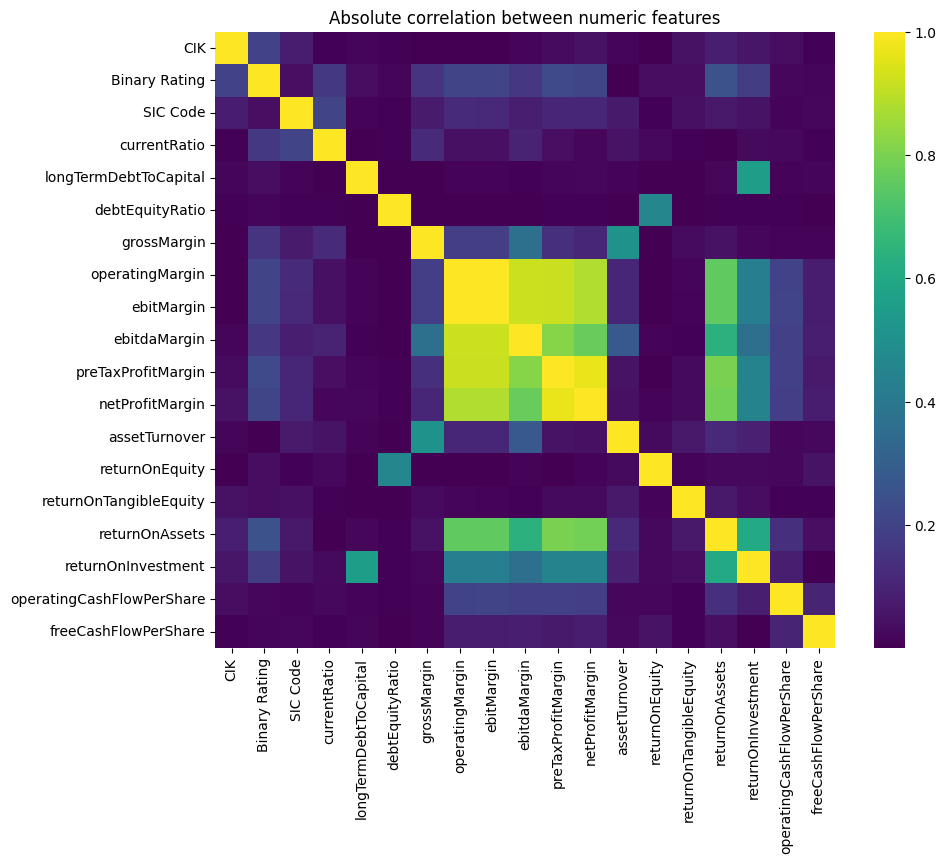

In [12]:
# Quick EDA
display(df.info())
display(df.describe().T)
# Rating distribution
if "Rating" in df.columns:
    display(df["Rating"].value_counts())
else:
    for c in df.columns:
        if "rating" in c.lower():
            display(df[c].value_counts())

# Correlation heatmap for numeric features (subset to avoid huge plot)
num = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(10,8))
sns.heatmap(df[num].corr().abs(), cmap="viridis")
plt.title("Absolute correlation between numeric features")
plt.show()

In [13]:
# =========================================================
# 2. Chuẩn hóa Rating về 10 class
# =========================================================
def normalize_rating(r):
    r = str(r).upper().strip()
    if r.startswith("AAA"):
        return "AAA"
    elif r.startswith("AA"):
        return "AA"
    elif r.startswith("A") and not r.startswith("AA") and not r.startswith("AAA"):
        return "A"
    elif r.startswith("BBB"):
        return "BBB"
    elif r.startswith("BB") and not r.startswith("BBB"):
        return "BB"
    elif r.startswith("B") and not r.startswith("BB") and not r.startswith("BBB"):
        return "B"
    elif r.startswith("CCC"):
        return "CCC"
    elif r.startswith("CC") and not r.startswith("CCC"):
        return "CC"
    elif r.startswith("C") and not r.startswith("CC") and not r.startswith("CCC"):
        return "C"
    elif r.startswith("D"):   # bao gồm D, SD, RD
        return "D"
    else:
        return None  # loại bỏ nếu không map được

df["Rating"] = df["Rating"].apply(normalize_rating)
df = df.dropna(subset=["Rating"]).reset_index(drop=True)

print("Phân phối Rating sau chuẩn hóa:")
print(df["Rating"].value_counts())

Phân phối Rating sau chuẩn hóa:
Rating
BBB    2461
A      2036
BB     1425
B      1020
AA      512
CCC     226
AAA      90
CC       19
C        11
D         5
Name: count, dtype: int64


In [13]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

min_vals = df.groupby("Rating")[num_cols].min()
max_vals = df.groupby("Rating")[num_cols].max()

print("Chỉ số nhỏ nhất theo Rating:")
print(min_vals)

print("\nChỉ số lớn nhất theo Rating:")
print(max_vals)

Chỉ số nhỏ nhất theo Rating:
          CIK  Binary Rating  SIC Code  currentRatio  longTermDebtToCapital  \
Rating                                                                        
A        1800              1    1000.0        0.4614                 0.0030   
AA       7084              1    1311.0        0.5423                 0.0004   
AAA      1800              1    2015.0        0.6630                 0.0017   
B        1750              0     100.0        0.2110               -86.3636   
BB       1750              0    1000.0        0.1749                -1.3810   
BBB      4447              1    1000.0        0.1749                -1.7228   
C       31235              0    1220.0        1.1060                -1.3810   
CC      23194              0    1000.0        0.7240                 0.1034   
CCC      2488              0    1000.0        0.3386                 0.0002   
D       23194              0    1220.0        0.9184                -1.3810   

        debtEquityRati

In [14]:
# =========================================================
# 3. Xác định cột numeric và categorical
# =========================================================
cat_cols = ['Sector'] if 'Sector' in df.columns else []
num_cols = [col for col in df.columns if col not in ['Rating'] + cat_cols]


In [15]:
# --- Threshold dictionary for scoring ---
thresholds = {
    "currentRatio": {"high": 34.0768, "low": -0.932005},
    "quickRatio": {"high": 1.0, "low": -1.893266},
    "cashRatio": {"high": 0.5, "low": -0.192736},
    "daysOfSalesOutstanding": {"high": 90, "low": 0, "reverse": True},
    "assetTurnover": {"high": 8.5039, "low": 0.0684},
    "fixedAssetTurnover": {"high": 2.0, "low": 0.5},
    "payablesTurnover": {"high": 15, "low": -76.662850, "reverse": True},
    "netProfitMargin": {"high": 219.3903, "low": -414.8248},
    "returnOnAssets": {"high": 114.7169, "low": -33753.148610},
    "returnOnEquity": {"high": 7038.4610, "low": -11258.2100},
    "debtEquityRatio": {"high": 194.3750, "low": -1473.0980, "reverse": True},
    "debtRatio": {"high": 0.8, "low": 0.5, "reverse": True},
    "freeCashFlowPerShare": {"high": 7181.092, "low": -4912.742},
    "operatingCashFlowPerShare": {"high": 6439270, "low": -11950},
}

# --- Scoring functions ---
def score_feature(value, config):
    if pd.isna(value):
        return 0
    reverse = config.get("reverse", False)
    high, low = config["high"], config["low"]

    if not reverse:
        if value > high: 
            return 1
        elif value < low: 
            return -1
    else:  # lower is better
        if value < low: 
            return 1
        elif value > high: 
            return -1
    return 0

def total_score(row):
    score = 0
    for feature, config in thresholds.items():
        if feature in row:
            score += score_feature(row[feature], config)
    return score

# --- Rating mapping table ---
rating_mapping = [
    (9, "AAA"),
    (7, "AA"),
    (5, "A"),
    (3, "BBB"),
    (1, "BB"),
    (-1, "B"),
    (-3, "CCC"),
    (-5, "CC"),
    (-7, "C"),
    (-999, "D"),
]

def map_score_to_rating(score):
    for threshold, rating in rating_mapping:
        if score >= threshold:
            return rating

# --- Synthetic data generator ---
def jitter_sample(series, size, noise=0.05):
    # Chỉ lấy giá trị numeric
    vals = pd.to_numeric(series, errors="coerce").dropna().values
    if len(vals) == 0:
        # fallback random nếu toàn NaN/chuỗi
        return np.random.uniform(low=0, high=1, size=size)
    idx = np.random.choice(len(vals), size=size, replace=True)
    sampled = vals[idx].astype(float)
    if sampled.max() > sampled.min():
        noise_scale = (sampled.max() - sampled.min()) * noise
    else:
        noise_scale = 0.01
    return sampled + np.random.normal(0, noise_scale, size=size)

# --- Data balancing ---
MIN_SAMPLES = 2400
df_balanced = []

for label, group in df.groupby("Rating"):
    if len(group) < MIN_SAMPLES:
        n_to_add = MIN_SAMPLES - len(group)
        synthetic_rows = []
        for _ in range(n_to_add):
            row = {}
            for col in num_cols:
                if col in group.columns:
                    row[col] = jitter_sample(group[col], 1, noise=0.1)[0]
                else:
                    row[col] = np.nan
            for cat_col in cat_cols:
                if not group[cat_col].dropna().empty:
                    row[cat_col] = np.random.choice(group[cat_col].dropna().unique())
                else:
                    row[cat_col] = np.nan
            score = total_score(row)
            rating = map_score_to_rating(score)
            if rating == label:
                row["Rating"] = label
                synthetic_rows.append(row)

        synthetic_df = pd.DataFrame(synthetic_rows)
        group_balanced = pd.concat([group, synthetic_df], ignore_index=True)

        # Nếu chưa đủ, bổ sung bootstrap từ gốc
        if len(group_balanced) < MIN_SAMPLES:
            n_missing = MIN_SAMPLES - len(group_balanced)
            group_balanced = pd.concat([
                group_balanced,
                group.sample(n=n_missing, replace=True, random_state=42)
            ], ignore_index=True)

        df_balanced.append(group_balanced.sample(n=MIN_SAMPLES, random_state=42).reset_index(drop=True))
    else:
        df_balanced.append(group)

df_balanced = pd.concat(df_balanced).reset_index(drop=True)

print("\n--- Rating Distribution After Augment ---")
print(df_balanced['Rating'].value_counts())


--- Rating Distribution After Augment ---
Rating
BBB    2461
A      2400
AA     2400
AAA    2400
B      2400
BB     2400
C      2400
CC     2400
CCC    2400
D      2400
Name: count, dtype: int64


In [16]:
X = df_balanced.drop(columns=["Rating"])
y = df_balanced["Rating"]

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Impute + Scale
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
X_num = X.select_dtypes(include=["int64", "float64"])
X_imp = imputer.fit_transform(X_num)
X_scaled = scaler.fit_transform(X_imp)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# ------------------------------
# 2. Class Weights
# ------------------------------
classes = np.unique(y_enc)
weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_enc)
class_weights = dict(zip(classes, weights))
print("\nClass Weights:", class_weights)

# ------------------------------
# 3. Models
# ------------------------------
# LightGBM
lgb_model = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=len(le.classes_),
    class_weight=class_weights,
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)

# XGBoost (softprob để Voting soft hoạt động)
xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=len(le.classes_),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    eval_metric="mlogloss"
)

# RF
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

# ------------------------------
# 4. Ensemble
# ------------------------------
ensemble1 = VotingClassifier(
    estimators=[("lgb", lgb_model), ("xgb", xgb_model), ("rf", rf_model)],
    voting="soft"
)

# ------------------------------
# 5. Train
# ------------------------------
ensemble1.fit(X_train, y_train)



Class Weights: {0: 1.0025416666666667, 1: 1.0025416666666667, 2: 1.0025416666666667, 3: 1.0025416666666667, 4: 1.0025416666666667, 5: 0.9776919951239333, 6: 1.0025416666666667, 7: 1.0025416666666667, 8: 1.0025416666666667, 9: 1.0025416666666667}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4724
[LightGBM] [Info] Number of data points in the train set: 19248, number of used features: 19
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302951
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training from score -2.302544
[LightGBM] [Info] Start training

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(class_weight={0: 1.0025416666666667,
                                                           1: 1.0025416666666667,
                                                           2: 1.0025416666666667,
                                                           3: 1.0025416666666667,
                                                           4: 1.0025416666666667,
                                                           5: 0.9776919951239333,
                                                           6: 1.0025416666666667,
                                                           7: 1.0025416666666667,
                                                           8: 1.0025416666666667,
                                                           9: 1.0025416666666667},
                                             learning_rate=0.05,
                                             n_estimators=500, num_class=10,
                                             objective='multiclass',
                                             ra...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_class=10,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=300,
                                                     random_state=42))],
                 voting='soft')

In [17]:
# ------------------------------
# 6. Evaluate
# ------------------------------
y_pred = ensemble1.predict(X_test)
print("\nClassification Report (Macro F1):")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Macro-F1:", f1_score(y_test, y_pred, average="macro"))


Classification Report (Macro F1):
              precision    recall  f1-score   support

           A       0.73      0.70      0.72       480
          AA       0.83      0.81      0.82       480
         AAA       0.86      1.00      0.93       480
           B       0.96      0.81      0.88       480
          BB       0.89      0.93      0.91       480
         BBB       0.84      0.77      0.80       493
           C       0.87      0.80      0.83       480
          CC       0.81      0.89      0.85       480
         CCC       0.88      0.82      0.85       480
           D       0.86      1.00      0.93       480

    accuracy                           0.85      4813
   macro avg       0.85      0.85      0.85      4813
weighted avg       0.85      0.85      0.85      4813

Macro-F1: 0.8517780100579477


In [18]:
import joblib

# --- Save model ---
joblib.dump(ensemble1, "train1.pkl")
print("✅ Model đã được lưu: ensemble_model.pkl")


✅ Model đã được lưu: ensemble_model.pkl


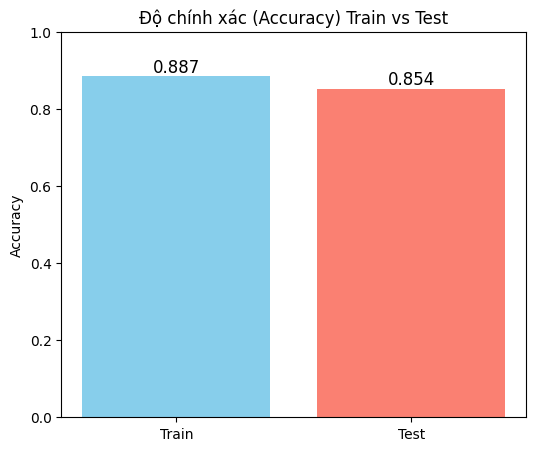

In [30]:
train_acc = accuracy_score(y_train, ensemble.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

# --- Vẽ biểu đồ cột ---
plt.figure(figsize=(6, 5))
plt.bar(["Train", "Test"], [train_acc, test_acc], color=["skyblue", "salmon"])
plt.title("Độ chính xác (Accuracy) Train vs Test")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # chuẩn hóa 0-1
for i, v in enumerate([train_acc, test_acc]):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center", fontsize=12)
plt.show()

In [36]:
# --- Xác định cột numeric và categorical ---
cat_cols = ['Sector'] if 'Sector' in df.columns else []

# Chỉ chọn cột numeric đúng nghĩa
num_cols = df.drop(columns=['Rating'] + cat_cols).select_dtypes(include=["int64", "float64"]).columns.tolist()

def predict_rating(input_dict):
    """
    input_dict: dict chứa dữ liệu đầu vào (có thể thiếu cột).
    """
    # 1. Tạo DataFrame chỉ với num_cols
    input_df = pd.DataFrame([input_dict])
    for col in num_cols:
        if col not in input_df.columns:
            input_df[col] = np.nan
    input_df = input_df[num_cols]

    # 2. Impute
    input_imp = imputer.transform(input_df)

    # 3. Scale
    input_scaled = scaler.transform(input_imp)

    # 4. Predict
    y_pred = ensemble.predict(input_scaled)

    # 5. Decode
    return le.inverse_transform(y_pred)[0]

sample = {
    "currentRatio": 2.1,
    "longTermDebtToCapital": 0.4, 
    "debtEquityRatio": 0.8,
    "grossMargin": 45.0,
    "operatingMargin": 20.0,
    "ebitMargin": 18.0,
    "ebitdaMargin": 25.0,
    "preTaxProfitMargin": 15.0,
    "netProfitMargin": 12.0,
    "assetTurnover": 0.9,
    "returnOnEquity": 10.0,
    "returnOnTangibleEquity": 9.0,
    "returnOnAssets": 7.0,
    "returnOnInvestment": 8.0,
    "operatingCashFlowPerShare": 5.0,
    "freeCashFlowPerShare": 3.0
}

print("Predicted Rating:", predict_rating(sample))

Predicted Rating: BB
